# Projeto 01  | Ciência dos Dados | Engenharia 2B #
***Aluno:*** Cicero Tiago Carneiro Valentim

<p style="font-size:11px">As informações disponíveis neste documento estão sujeitas a <b>alterações</b> até a data de entrega definitiva. </p>

Esse projeto visa avaliar dados com base na Organisation for Economic Co-operation and Development ***(OECD)***.
Serão cruzados dados para comparar o **consumo de calorias diárias por pessoa**, **expectativa de vida** e ***PIB per capita*** antes e depois de determinados países fazerem parte da organização. Além disso, países que ainda não fazem parte nos períodos estudados terão seus índices avaliados. Por fim, será que <b style="color:blue">é correto dizer que países que entraram na OECD são beneficiados de forma expressiva se comparados a países que não entraram?</b>

**1)** Importando as bibliotecas necessárias e definindo funções:

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from random import randint
import numpy as np
import seaborn as sns
import os

In [3]:
def pick(lista, qtd):
    temp = []
    while len(temp) < qtd:
        temp_a = lista[randint(0,len(lista)-1)]
        if temp_a not in temp:
            temp.append(temp_a)
    return temp
        

**2)** Definindo o caminho das tabelas

In [4]:
tabs = os.getcwd() + "/tabs/"

<b>3)</b> Vamos tratar a lista de países e datas de entrada na Organização de forma que possamos obter um dicionário cujas chaves são strings com nomes de países e cujos valores são anos de ingresso. <br>Conjunto de paises membros da OECD e suas respectivas datas de entrada:<br><i style="font-size:12px;font-family:monospace">A lista de países pode ser acessada em: http://worldpopulationreview.com/countries/oecd-countries/</i>

In [5]:
# partindo da lista de países membros retirada do link referenciado acima, a seguinte string será fatiada, 
# filtrada e formatada em dicionário para que possa ser utilizada no tratamento dos dados.

paises = """Australia, June 7, 1971
Austria, September 29, 1961
Belgium, September 13, 1961
Canada, April 10, 1961
Chile, May 7, 2010
The Czech Republic, December 21, 1995
Denmark, May 30, 1961
Estonia, December 9, 2010
Finland, January 28, 1969
France, August 7, 1961
Germany, September 27, 1961
Greece, September 27, 1961
Hungary, May 7, 1996
Iceland, June 5, 1961
Ireland, August 17, 1961
Israel, September 7, 2010
Italy, March 29, 1962
Japan, April 28, 1974
Korea, December 12, 1996
Latvia, July 1, 2016
Lithuania, July 5, 2018
Luxembourg, December 7, 1961
Mexico, May 18, 1994
The Netherlands, November 13, 1961
New Zealand, May 29, 1973
Norway, July 4, 1961
Poland, November 22, 1996"""

paises = paises.split("\n")                 # """Norway, July 4, 1961
                                            # Poland, November 22, 1996""" --> ["Norway, July 4, 1961","Poland, November 22, 1996]

paises_oecd = {}
for i in range(len(paises)):
    paises[i] = paises[i].split(',')        #  "Poland, November 22, 1996" --> ["Poland"," November 22"," 1996"]
    paises[i][2].replace(" ","")            #  ["Poland"," November 22"," 1996"] --> ["Poland"," November 22","1996"]
    paises[i][2] = int(paises[i][2])        #  ["Poland"," November 22","1996"] --> ["Poland"," November 22", 1996]
    del paises[i][1]                        #  ["Poland"," November 22","1996"] --> ["Poland", 1996]
    paises_oecd[paises[i][0]]=[paises[i][1]]  #  ["Poland", 1996] --> {... "Poland": [1996], ...}
    

# Quantidade de países membros:
print("Quantidade de países membros: {}".format(len(paises_oecd)))

Quantidade de países membros: 27


In [7]:
print(paises_oecd)

{'Australia': [1971], 'Austria': [1961], 'Belgium': [1961], 'Canada': [1961], 'Chile': [2010], 'The Czech Republic': [1995], 'Denmark': [1961], 'Estonia': [2010], 'Finland': [1969], 'France': [1961], 'Germany': [1961], 'Greece': [1961], 'Hungary': [1996], 'Iceland': [1961], 'Ireland': [1961], 'Israel': [2010], 'Italy': [1962], 'Japan': [1974], 'Korea': [1996], 'Latvia': [2016], 'Lithuania': [2018], 'Luxembourg': [1961], 'Mexico': [1994], 'The Netherlands': [1961], 'New Zealand': [1973], 'Norway': [1961], 'Poland': [1996]}


Criando <i>dataframes</i> apenas com países membros:

In [5]:
paises_oecd = pd.DataFrame(paises_oecd).T
paises_oecd # necessário renomear a coluna int(0) para "years" e definir o index como "country"

,0
Australia,1971
Austria,1961
Belgium,1961
Canada,1961
Chile,2010
The Czech Republic,1995
Denmark,1961
Estonia,2010
Finland,1969
France,1961


In [6]:
paises_oecd = paises_oecd.rename(columns={0:"years",})
paises_oecd.index.names = ["country"]
paises_oecd.head(3)                           # formatado

,years
country,
Australia,1971
Austria,1961
Belgium,1961


<b>4)</b> Importando <i>dataframes</i> obtidos no <b><a href="gapminder.org">Gapminder</a></b>.

In [7]:
food = pd.read_excel(tabs+"food_consumption.xlsx")      # kcal/pessoa/dia
life = pd.read_excel(tabs+'life_expectancy_years.xlsx') # expectativa de vida

Verificando a formatação dos <i>dataframes</i>:

In [8]:
food.head(3) # necessário 'setar' o index do dataframe

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
life.head(3) # index 'setado'

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9


Formatando as tabelas

In [10]:
food.index.names = ["country"]           # definindo o nome da primeira coluna como "country"
food.columns.names = ["years"]           # definindo o nome da primeira linha como "years"

life = life.set_index(["country"])       # definindo a coluna "country" como index
life.columns.names = ["years"]           # definindo o nome da primeira linha como "years"

Removendo valores nulos das tabelas

In [11]:
food = food.dropna()
life = life.dropna() 

template = "food:\t{0}\nlife:\t{1}".format(food.shape,life.shape)
print(template)

food:	(151, 47)
life:	(184, 219)


Como podemos ver, o dataframe "life" é o que possui a maior quantidade de países listados. Usaremos a lista de países dele de agora em diante como referência.

<b>5)</b> Separando os indicadores entre os países que participam e entre os que não participam da organização:

In [12]:
food_oecd = food.reindex(paises_oecd.index)
life_oecd = life.reindex(paises_oecd.index)

In [13]:
pAll = pd.DataFrame(life.index).set_index("country")
pIn = pd.DataFrame(paises_oecd.index).set_index('country')

In [14]:
temp = []
for pais in pAll.index:
    if pais not in pIn.index:
        temp.append(pais)
pOut = pd.DataFrame(temp)
temp = []
pOut = pOut.set_index(0)
pOut.index.names = ["country_out"]

In [15]:
pOut.shape

(160, 0)

<b>6)</b> Agora que temos os dados separados em diversas categorias, vamos unificar todos eles

In [16]:
data = {
    "in":{
        "food":{},
        "life":{}
    },
    "out":{
        "food":{},
        "life":{}
    }
}

In [17]:
for pais in pIn.index:
    if pais in food.T:
        data["in"]["food"][pais]=pd.DataFrame(food.T[pais])
    if pais in life.T:    
        data["in"]["life"][pais]=pd.DataFrame(life.T[pais])

In [18]:
for pais in pOut.index:
    if pais in food.T:
        data["out"]["food"][pais]=pd.DataFrame(food.T[pais])
    if pais in life.T:    
        data["out"]["life"][pais]=pd.DataFrame(life.T[pais])

In [19]:
data['in']['food']["Australia"].head(3)

,Australia
years,
1961,3086.60
1962,3094.80
1963,3132.78


In [20]:
data['in']['food']["Australia"]

,Australia
years,
1961,3086.60
1962,3094.80
1963,3132.78
1964,3103.23
1965,3053.95
1966,3133.05
1967,3089.43
1968,3133.11
1969,3156.68


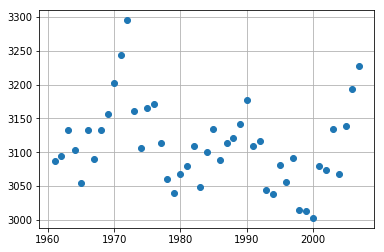

In [21]:
plt.plot(data['in']['food']["Australia"],'o')
plt.grid(True)
plt.show()

In [22]:
paises_oecd.sort_values(by="years").items

<bound method DataFrame.iteritems of                     years
country                  
Iceland              1961
Austria              1961
Belgium              1961
Canada               1961
The Netherlands      1961
Luxembourg           1961
Denmark              1961
France               1961
Germany              1961
Greece               1961
Ireland              1961
Norway               1961
Italy                1962
Finland              1969
Australia            1971
New Zealand          1973
Japan                1974
Mexico               1994
The Czech Republic   1995
Korea                1996
Hungary              1996
Poland               1996
Israel               2010
Estonia              2010
Chile                2010
Latvia               2016
Lithuania            2018>

In [23]:
pick(pOut.index,4)

['Niger', 'Ukraine', 'Trinidad and Tobago', 'Paraguay']

Os valores sorteados em uma dada execução do código foram:<br>
    <p style="font-family: monospace;color:red;font-size:1em;display:inline">
    Out[119]:
    </p>
    <p style="font-family: monospace;font-size:1em;display:inline">
    ['Panama', 'Swaziland', 'Sudan', 'Thailand']
    </p>

Vamos observar com mais atenção 4 países de cada grupo (fora e dentro da organização), listados a seguir, partindo de 1965 até 1979 e compará-los com outros 4 países que não estavam na organização.
<br>
<b>Países dentro da organização e anos de entrada: </b>
<ul>
    <li>Finland      1969</li>
    <li>Australia    1971</li>
    <li>New Zealand  1973</li>
    <li>Japan        1974</li>
</ul>
<b>Países fora da organização: </b>
<ul>
    <li>Panama</li>
    <li>Swaziland</li>
    <li>Sudan</li>
    <li>Thailand</li>
</ul>

Série de anos observados:

In [24]:
anos = range(1965,1980)

Série de Calorias por pessoa por dia nos anos observados:
['Panama', 'Swaziland', 'Sudan', 'Thailand']

In [25]:
food_tab_in = data['in']['food']["Finland"].loc[anos].join([
          data['in']['food']["Australia"].loc[anos],
          data['in']['food']["New Zealand"].loc[anos],
          data['in']['food']["Japan"].loc[anos]])

food_tab_out = data['out']['food']["Panama"].loc[anos].join([
          data['out']['food']["Swaziland"].loc[anos],
          data['out']['food']["Sudan"].loc[anos],
          data['out']['food']["Thailand"].loc[anos]])

print(food_tab_in.head(),'\n')
print(food_tab_out.head())

       Finland  Australia  New Zealand    Japan
years                                          
1965   3123.81    3053.95      2965.94  2602.37
1966   3141.07    3133.05      3080.26  2624.00
1967   3067.89    3089.43      2999.31  2671.27
1968   3069.50    3133.11      2971.38  2682.98
1969   3182.00    3156.68      2962.08  2678.60 

        Panama  Swaziland    Sudan  Thailand
years                                       
1965   2129.75    2173.25  1597.24   1966.11
1966   2193.40    2162.42  1603.18   2052.04
1967   2250.74    2097.62  1720.90   1986.54
1968   2270.35    2241.74  1764.04   1998.13
1969   2376.37    2242.13  1803.23   2038.62


Série de expectativa de vida nos anos observados:

In [26]:
life_tab_in = data['in']['life']["Finland"].loc[anos].join([
          data['in']['life']["Australia"].loc[anos],
          data['in']['life']["New Zealand"].loc[anos],
          data['in']['life']["Japan"].loc[anos]])

life_tab_out = data['out']['life']["Panama"].loc[anos].join([
          data['out']['life']["Swaziland"].loc[anos],
          data['out']['life']["Sudan"].loc[anos],
          data['out']['life']["Thailand"].loc[anos]])

print(life_tab_in.head(),'\n')
print(life_tab_out.head())

       Finland  Australia  New Zealand  Japan
years                                        
1965      68.8       71.4         71.5   70.5
1966      69.3       71.2         71.3   71.3
1967      69.5       71.5         71.7   71.6
1968      69.5       71.1         71.4   72.0
1969      69.4       71.5         71.8   72.2 

       Panama  Swaziland  Sudan  Thailand
years                                    
1965     65.8       48.7   50.5      60.1
1966     66.3       49.1   51.0      60.5
1967     66.8       49.6   51.4      61.0
1968     67.3       50.1   51.8      61.4
1969     67.8       50.7   52.2      61.9


Série de PIB <i>per capita</i> nos anos observados:

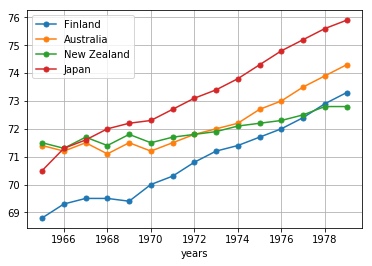

In [27]:
life_tab_in.plot(marker='.', markersize=10,grid=True)

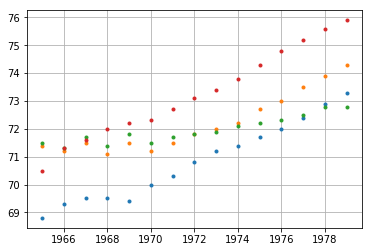

In [28]:
plt.plot(life_tab_in,'.')
plt.grid(True)

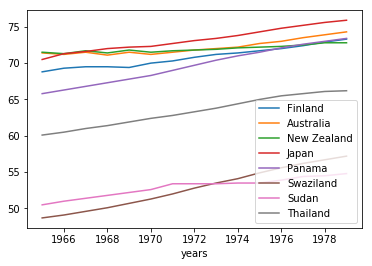

In [29]:
life_tab_in.join(life_tab_out).plot()

In [83]:
food_oecd.loc[:,anos].dropna().describe()

years,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3012.840500,3051.940000,3048.033500,3062.480500,3074.380000,3104.509000,3128.217000,3134.586500,3158.576000,3143.002500,3122.098500,3156.571500,3145.969000,3175.968500,3187.447000
std,254.906959,235.843744,228.193116,224.743899,238.739661,244.400019,247.331738,233.368748,271.241711,246.890124,265.345559,243.903606,250.333232,262.702678,263.171254
min,2418.350000,2460.970000,2508.820000,2544.510000,2564.070000,2592.360000,2588.660000,2628.720000,2572.830000,2693.650000,2492.110000,2604.330000,2559.080000,2616.290000,2661.010000
25%,2941.332500,2937.595000,2972.425000,2962.360000,2958.577500,3001.230000,3006.317500,3063.650000,3015.685000,3019.592500,2985.885000,3037.107500,3036.475000,3038.042500,3032.035000
50%,3080.685000,3106.040000,3075.255000,3081.990000,3103.785000,3137.335000,3181.010000,3159.495000,3200.155000,3159.770000,3162.965000,3206.480000,3179.735000,3152.425000,3193.905000
75%,3137.177500,3202.315000,3205.115000,3214.375000,3204.700000,3249.842500,3259.045000,3263.310000,3309.622500,3293.672500,3269.990000,3288.322500,3326.075000,3351.882500,3347.875000
max,3396.640000,3389.160000,3421.630000,3419.400000,3433.240000,3451.840000,3488.000000,3478.360000,3556.530000,3526.330000,3538.330000,3590.810000,3581.830000,3602.800000,3604.630000


In [80]:
food_oecd.loc[:,anos].describe()

years,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3012.840500,3051.940000,3048.033500,3062.480500,3074.380000,3104.509000,3128.217000,3134.586500,3158.576000,3143.002500,3122.098500,3156.571500,3145.969000,3175.968500,3187.447000
std,254.906959,235.843744,228.193116,224.743899,238.739661,244.400019,247.331738,233.368748,271.241711,246.890124,265.345559,243.903606,250.333232,262.702678,263.171254
min,2418.350000,2460.970000,2508.820000,2544.510000,2564.070000,2592.360000,2588.660000,2628.720000,2572.830000,2693.650000,2492.110000,2604.330000,2559.080000,2616.290000,2661.010000
25%,2941.332500,2937.595000,2972.425000,2962.360000,2958.577500,3001.230000,3006.317500,3063.650000,3015.685000,3019.592500,2985.885000,3037.107500,3036.475000,3038.042500,3032.035000
50%,3080.685000,3106.040000,3075.255000,3081.990000,3103.785000,3137.335000,3181.010000,3159.495000,3200.155000,3159.770000,3162.965000,3206.480000,3179.735000,3152.425000,3193.905000
75%,3137.177500,3202.315000,3205.115000,3214.375000,3204.700000,3249.842500,3259.045000,3263.310000,3309.622500,3293.672500,3269.990000,3288.322500,3326.075000,3351.882500,3347.875000
max,3396.640000,3389.160000,3421.630000,3419.400000,3433.240000,3451.840000,3488.000000,3478.360000,3556.530000,3526.330000,3538.330000,3590.810000,3581.830000,3602.800000,3604.630000


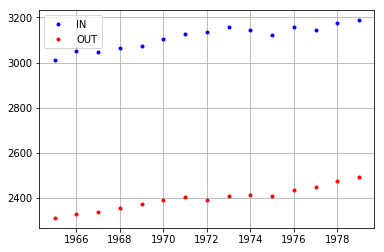

In [78]:
plt.plot(anos,food_oecd.loc[:,anos].dropna().mean(),'.',color="blue",label="IN")
plt.plot(anos,food.loc[:,anos].dropna().mean(),'.',color="red",label="OUT")
plt.legend()
plt.grid(True)